# Day 20

https://adventofcode.com/2020/day/20

In [1]:
import numpy as np

def getTiles(filename):
    with open(filename) as f:
        #blocks = [ b.split(":\n") for b in f.read().split("\n\n") ] # there's final \n to be removed from last tile
        blocks = [ b.split(":\n") if b[-1]!="\n" else b[0:-1].split(":\n") for b in f.read().split("\n\n") ]
    tiles_string = []
    for b in blocks:
        tn = int(b[0].replace("Tile ",""))
        tile = b[1].split("\n")
        tiles_string.append((tn,tile))
    tilesdic = {}
    tiles = []
    for (n,t) in tiles_string:
        tile = np.array( [[1 if c=="." else 0 for c in r ] for r in t], ndmin=2) 
        tiles.append((n,tile))
        tilesdic[n] = tile
    return tiles, tilesdic

In [2]:
#tiles = getTiles("data/day20test0.txt")
tiles, tilesdic = getTiles("data/input20.txt") # remove last newline from input

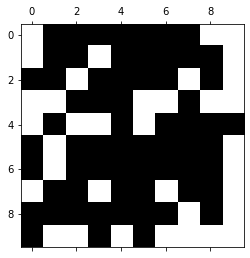

In [3]:
import matplotlib
import matplotlib.pyplot as plt

n,t = tiles[0]
plt.matshow(t,cmap="binary")
plt.show()

## Part 1

> To check that you've assembled the image correctly, multiply the IDs of the four corner tiles together.

In order to do this I don't really need to solve the puzzle (yet!), just to find the 4 corners. Corners will only have 2 borders in common with other 2 pieces.

**Careful!** Since the pieces can be rotated, I should not only check for direct correpondence, but also flipping one side!

In [4]:
def getAdiacentSimple(tiles):

    tborders = []
    for n,t in tiles:
        tborders.append((n,[t[0],t[:,9],t[9],t[:,0]]))
    sameb = {}

    for n0,tb0 in tborders:
        sameb[n0] = []
        for b0 in tb0:
            for n,tb in tborders:
                if n==n0: # same piece, skip
                    continue
                for b in tb:
                    if (b==b0).all() or (b==b0[::-1]).all(): # check both orientations!
                        sameb[n0].append(n)
                        #print(n0,b0,n,b)
    return sameb, tborders

sameb, tborders = getAdiacentSimple(tiles)

sol1 = 1
for n in sameb.keys():
    #print(n,len(sameb[n]))
    if len(sameb[n])==2:
        sol1 *= n
print("Solution Part 1 =", sol1)

Solution Part 1 = 29125888761511


## Part 2

> Assemble the tiles into an image. 

So ultimately we should indeed solve the puzzle before proceeding to solve the second part. And of course:

> each image tile has been rotated and flipped to a random orientation.

I could start from the `sameb` dictionary to solve the piece relative placement ignoring orientation (up to a flip on the puzzle diagonal), and I could maybe solve the orientation a second step, but after several attempt I cannot write I decent alogorithm to do it, so I'll probably write something more complex including border matching and rotation, so I can proceed by placing one piece after the other following the rows. I can probably still use the `sameb` dictionary to reduce the number of pieces to try at each step, but I'm sure it's worth the effort

In [105]:
tiles, tiles_dic = getTiles("data/day20test0.txt")
#tiles, tilesdic = getTiles("data/input20.txt")

side = int(len(tiles)**0.5)
print(side)

#puzzle = np.zeros((side,side),dtype=int)

3


In [100]:
# Separate pieces in Angles, Borders and Centers

sameb, tborders = getAdiacentSimple(tiles)

tiles_family = [[],[],[]] # angles, borders, centers

for p in sameb.keys():
    b = len(sameb[p])
    if b==2:
        tiles_family[0].append(p)
    elif b==3:
        tiles_family[1].append(p)
    elif b==4:
        tiles_family[2].append(p)

#tiles_family, sameb

In [101]:


# place first angle piece
loc = [(0,0)]
puzzle[0][0] = tiles_family[0][0] 

# place neighbours to first angle (breaking symmetry)
puzzle[0][1] = sameb[puzzle[0][0]][0]
puzzle[1][0] = sameb[puzzle[0][0]][1]

sameb_placed = sameb

sameb_placed[puzzle[0][0]] = []
sameb_placed[puzzle[1][0]].remove(puzzle[0][0]) 
sameb_placed[puzzle[0][1]].remove(puzzle[0][0]) 

last = [ puzzle[1][0], puzzle[0][1] ]

it = 0
while len(puzzle[puzzle==0]):
    it += 1
    if it == 2:
        break
    
    for nn in sameb_places.keys():
        if 
    
sameb_placed

{2311: [1427, 3079],
 1951: [],
 1171: [2473, 1489],
 1427: [1489, 2473, 2311, 2729],
 1489: [1171, 1427, 2971],
 2473: [3079, 1427, 1171],
 2971: [1489, 2729],
 2729: [2971, 1427],
 3079: [2473, 2311]}